In [1]:
%run 'Functions.ipynb'

In [2]:
ids = [e.meta.id for e in Search(index='hep-recent').fields(['_id']).scan()]

In [3]:
len(ids)

99999

In [4]:
def term_vectors_basic(ids, field):
    res = client.mtermvectors(
        index='hep-analysis', 
        doc_type='hep',
        ids=ids,
        fields=[field],
        field_statistics=False,
        term_statistics=True,
        offsets=False,
        payloads=False,
        positions=False
    )
    return [e['term_vectors'][field]['terms'] for e in res['docs'] if field in e['term_vectors']]

In [5]:
res = term_vectors_basic(ids[0:100], 'abstracts.value')

In [6]:
word_freq = {}

In [7]:
for i in range(0, 500):
    vectors = term_vectors_basic(ids[100 * i:100 * i + 100], 'abstracts.value')
    for vec in vectors:
        for word, freq in vec.items():
            if word not in word_freq:
                word_freq[word] = freq['ttf']

In [8]:
len(word_freq)

2081077

In [9]:
word_ordered = sorted(word_freq.items(), key=lambda x: -x[1])
word_ordered[:20]

[('model', 53669),
 ('use', 45293),
 ('result', 38014),
 ('show', 33286),
 ('present', 28912),
 ('study', 28750),
 ('energy', 28028),
 ('find', 27493),
 ('can', 27092),
 ('mass', 25923),
 ('field', 25375),
 ('theory', 24511),
 ('data', 22766),
 ('two', 21447),
 ('also', 21299),
 ('large', 19569),
 ('obtain', 19411),
 ('system', 19191),
 ('one', 19027),
 ('galaxy', 18734)]

In [10]:
x, y = zip(*word_ordered)

In [11]:
def plot_interval(x, y, start=0, count=100):
    plt.xlim(start, start + count)
    plt.xticks(range(start, start + count), x[start:start + count], rotation=90)
    plt.plot(y)

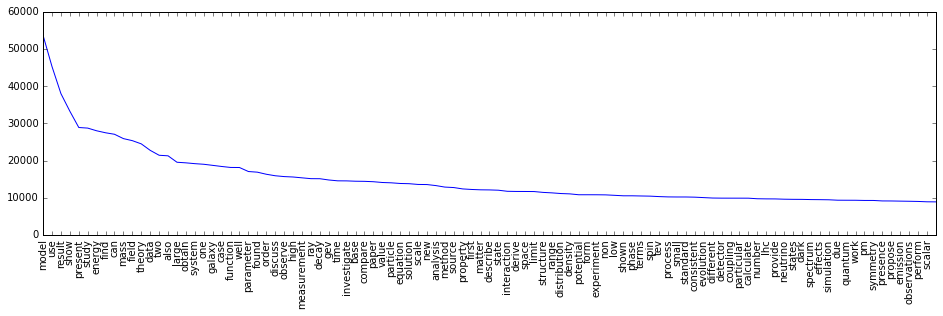

In [12]:
plot_interval(x, y)

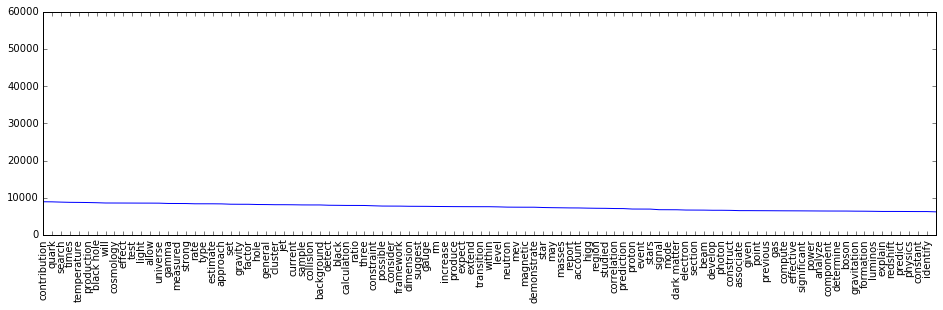

In [13]:
plot_interval(x, y, 100)

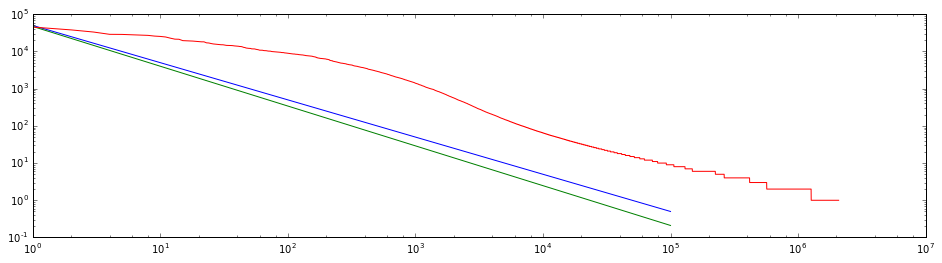

In [14]:
plt.xscale('log')
plt.yscale('log')
plt.plot(5e9 * sp.stats.zipf.pmf(range(100000), 1.00001))
plt.plot(7e5 * sp.stats.zipf.pmf(range(100000), 1.07))
plt.plot(y)

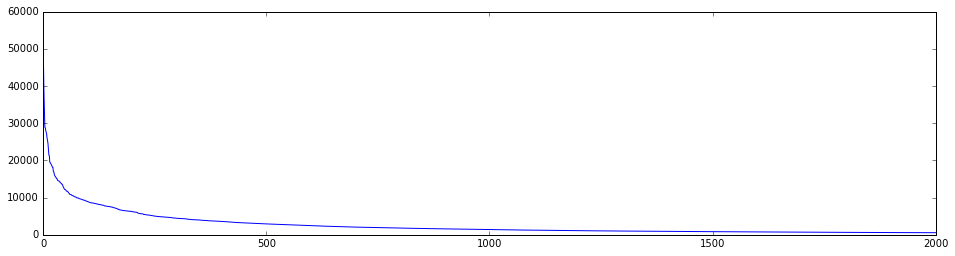

In [15]:
plt.xlim(0, 2000)
plt.plot(y)

In [16]:
word_freq['higg']

7199

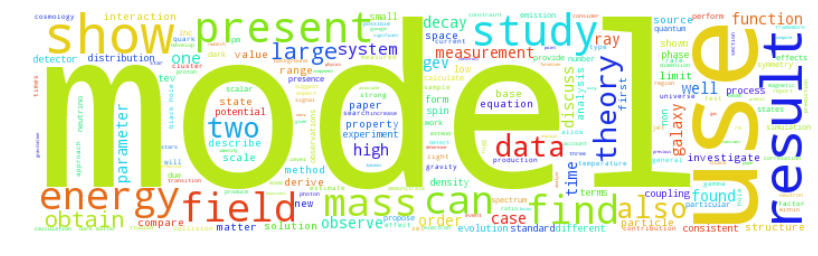

In [17]:
plt.axis("off")
plt.imshow(WordCloud(width=700, background_color='white').generate_from_frequencies(word_freq.items()))

In [18]:
len([k for k, v in word_freq.items() if v >= 500])

2157

In [19]:
words13 = fold_vectors(term_vectors(interval_ids('2013-05-01'), 'abstracts.value'))
words14 = fold_vectors(term_vectors(interval_ids('2014-05-01'), 'abstracts.value'))

In [20]:
len([k for k, v in words13.items() if v['term_freq'] > 5])

7412

In [21]:
def cloud(freqs):
    image = WordCloud(width=700, background_color='white') \
        .generate_from_frequencies(freqs)
    plt.axis("off")
    plt.imshow(image)

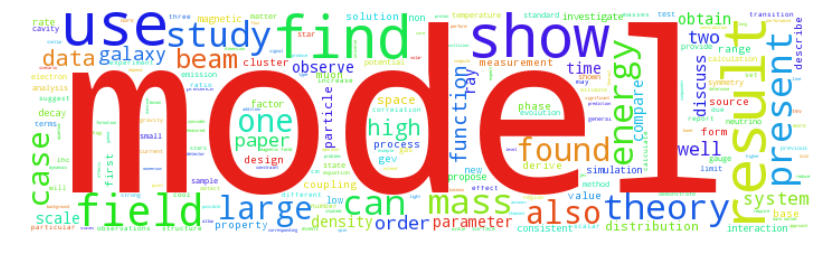

In [22]:
cloud([(k, v['term_freq']) for k, v in words13.items()])

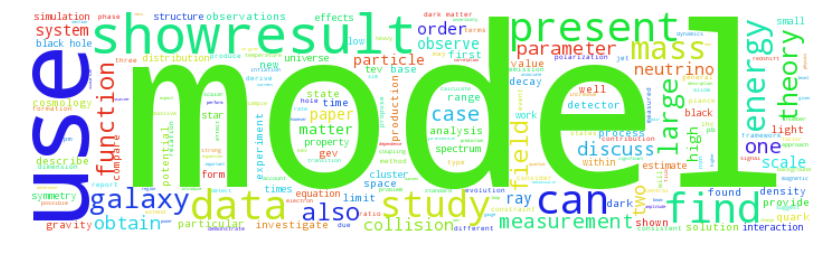

In [23]:
cloud([(k, v['term_freq']) for k, v in words14.items()])

In [24]:
y13 = {}
y14 = {}

for k, v in words13.items():
    if k not in y13:
        y13[k] = 0
    if k not in y14:
        y14[k] = 0
    y13[k] += v['term_freq']
    
for k, v in words14.items():
    if k not in y13:
        y13[k] = 0
    if k not in y14:
        y14[k] = 0
    y14[k] += v['term_freq']

In [25]:
sorted(y13)
sorted(y14)
l13, d13 = zip(*y13.items())
l14, d14 = zip(*y14.items())
assert l13 == l14

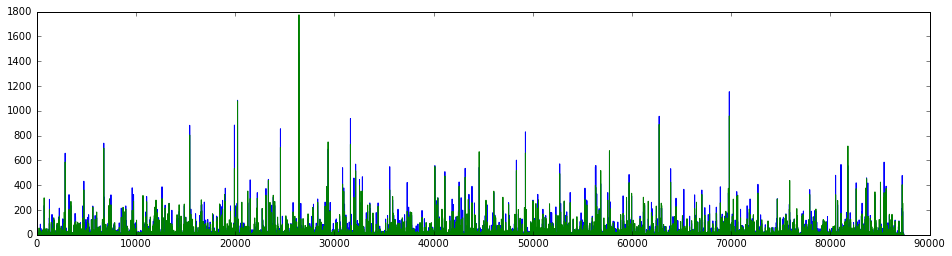

In [26]:
plt.plot(d13)
plt.plot(d14)

In [27]:
diff = np.abs(np.array(d13) - d14)

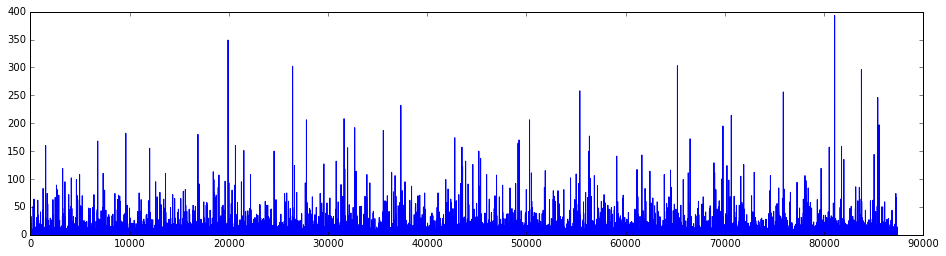

In [28]:
#plt.xticks(range(100), l13, rotation=90)
plt.plot(diff)